In [1]:
# Get necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data set
from google.colab import files
uploaded = files.upload()

Saving cardio_clean.csv to cardio_clean.csv


In [4]:
# Load data into data frame
df = pd.read_csv("cardio_clean.csv")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76,120,80,1,1,1,0,1,0
69996,61,1,158,126,140,90,2,2,0,0,1,1
69997,52,2,183,105,180,90,3,1,0,1,0,1
69998,61,1,163,72,135,80,1,2,0,0,0,1


In [5]:
# Get basic statistics on data
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Calculate BMI by dividing weight (kg) by sq of height (m)
BMI = df ['weight']/((df['height']/100)**2)
obese = BMI > 30  # Obese if BMI is over 30

In [14]:
# Add obese column to data set
df['obese'] = obese
df.obese = df.obese.astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,obese
0,50,2,168,62,110,80,1,1,0,0,1,0,0
1,55,1,156,85,140,90,3,1,0,0,1,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1,0
3,48,2,169,82,150,100,1,1,0,0,1,1,0
4,47,1,156,56,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76,120,80,1,1,1,0,1,0,0
69996,61,1,158,126,140,90,2,2,0,0,1,1,1
69997,52,2,183,105,180,90,3,1,0,1,0,1,1
69998,61,1,163,72,135,80,1,2,0,0,0,1,0


In [27]:
# Normalization with 0 = always good and 1 = always bad
# For cholesterol and glucose, make 0 if value is 1 and 1 if value is greater than 1
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where (df['gluc'] == 1,0,1)

df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [28]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,obese
0,50,2,168,62,110,80,0,0,0,0,1,0,0
1,55,1,156,85,140,90,1,0,0,0,1,1,1
2,51,1,165,64,130,70,1,0,0,0,0,1,0
3,48,2,169,82,150,100,0,0,0,0,1,1,0
4,47,1,156,56,100,60,0,0,0,0,0,0,0
5,60,1,151,67,120,80,1,1,0,0,0,0,0
6,60,1,157,93,130,80,1,0,0,0,1,0,1
7,61,2,178,95,130,90,1,1,0,0,1,1,0
8,48,1,158,71,110,70,0,0,0,0,1,0,0
9,54,1,164,68,110,60,0,0,0,0,0,0,0


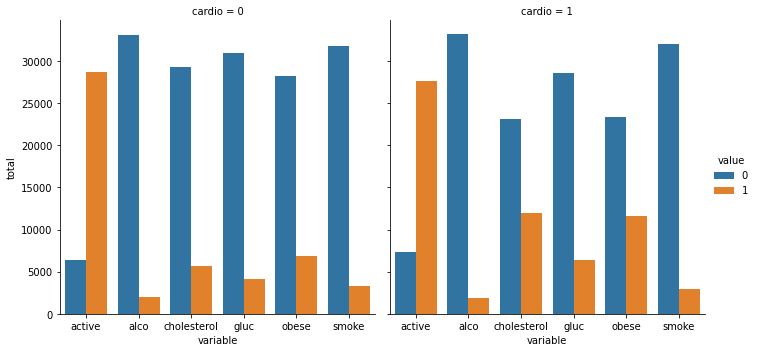

In [35]:
# Draw categorical plot
# Create dataframe for cat plot using pd.melt with values from cholesterol, glucose, smoke, alcohol, active, and obese
def draw_plot():
  df_cat = pd.melt(df,id_vars = ["cardio"], value_vars = ["cholesterol", "gluc", "smoke", "alco", "active", "obese"])

# Group and reformat data, split by 'cardio' adn show counts of each feature
  df_cat = pd.DataFrame(df_cat.groupby(["variable", "value", "cardio"])["value"].count()).rename(columns={"value": "total"}).reset_index()

# Draw catplot
  fig=sns.catplot(x = "variable", y="total", hue="value", kind="bar", col="cardio", data=df_cat)

draw_plot()

In [36]:
# Clean the data
df = df.loc[(df.ap_lo <= df.ap_hi)
                 & (df.height >= df.height.quantile(0.025))
                 & (df.height <= df.height.quantile(0.975))
                 & (df.weight >= df.weight.quantile(0.025))
                 & (df.weight <= df.weight.quantile(0.975)), :]

In [39]:
# Correlation matrix
corr=df.corr()
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,obese
age,1.000000,-0.018519,-0.077054,0.069940,0.018795,0.153249,0.129704,0.086742,-0.044424,-0.027026,-0.011568,0.240053,0.081895
gender,-0.018519,1.000000,0.506452,0.130221,0.005065,0.059766,-0.037652,-0.021162,0.337857,0.168889,0.007785,0.002360,-0.119985
height,-0.077054,0.506452,1.000000,0.251535,0.004588,0.017955,-0.063513,-0.030463,0.187833,0.089788,-0.005669,-0.024087,-0.212374
weight,0.069940,0.130221,0.251535,1.000000,0.027035,0.227966,0.135993,0.107086,0.056539,0.059925,-0.014440,0.170063,0.699535
ap_hi,0.018795,0.005065,0.004588,0.027035,1.000000,0.072806,0.022808,0.011112,-0.001927,0.000770,-0.000224,0.050558,0.018885
ap_lo,0.153249,0.059766,0.017955,0.227966,0.072806,1.000000,0.150376,0.074852,0.023284,0.033049,0.001552,0.327200,0.174051
cholesterol,0.129704,-0.037652,-0.063513,0.135993,0.022808,0.150376,1.000000,0.383745,0.012683,0.038448,0.002489,0.203473,0.142732
gluc,0.086742,-0.021162,-0.030463,0.107086,0.011112,0.074852,0.383745,1.000000,-0.004155,0.014299,-0.010149,0.088450,0.108855
smoke,-0.044424,0.337857,0.187833,0.056539,-0.001927,0.023284,0.012683,-0.004155,1.000000,0.341201,0.026937,-0.020340,-0.033105
alco,-0.027026,0.168889,0.089788,0.059925,0.000770,0.033049,0.038448,0.014299,0.341201,1.000000,0.025845,-0.011084,0.010686


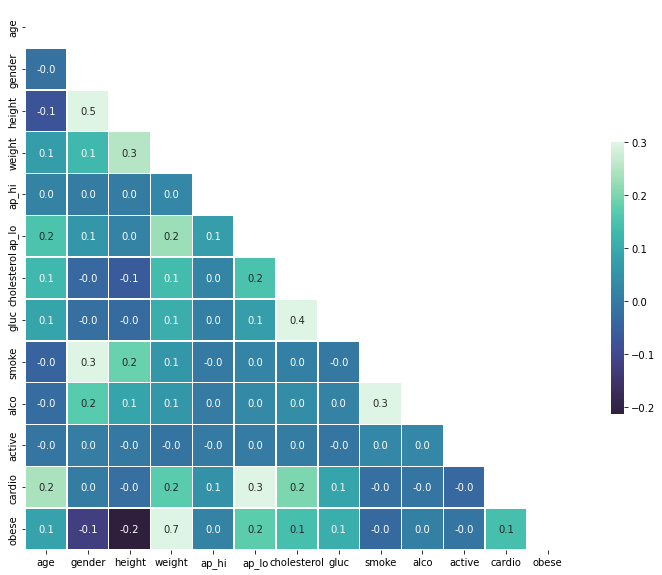

In [44]:
# Heat Map
f, ax = plt.subplots(figsize=(15, 10))  # Matplotlip figure
corr = df.corr()
mask = np.triu(corr)  # Mask for upper triangle
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='mako', fmt=".1f", vmax=.3,
                 linewidths=.5, square=True, cbar_kws={"shrink":0.5},
                 center=0)# Draw heat map
plt.show()  # Show the heat map